In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pandas import read_csv
from tqdm import tqdm
sns.set_style('white')
sns.set_context('notebook', font_scale=1.33)
%matplotlib inline

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define subscales.
subscales = {
    '7u':    ['7u7d-q01','7u7d-q03','7u7d-q04','7u7d-q06','7u7d-q07','7u7d-q08','7u7d-q13'],
    '7d':    ['7u7d-q02','7u7d-q05','7u7d-q09','7u7d-q10','7u7d-q11','7u7d-q12','7u7d-q14'],
    'gad7':  ['gad7-q01','gad7-q02','gad7-q03','gad7-q04','gad7-q05','gad7-q06','gad7-q07'],
    'bis':   ['bisbas-q01','bisbas-q02','bisbas-q03','bisbas-q04'],
    'bas':   ['bisbas-q05','bisbas-q06','bisbas-q07','bisbas-q08',
              'bisbas-q09','bisbas-q10','bisbas-q11','bisbas-q12'],
    'shaps': ['shaps-q01','shaps-q02','shaps-q03','shaps-q04','shaps-q05',
              'shaps-q06','shaps-q07','shaps-q08','shaps-q09','shaps-q10',
              'shaps-q11','shaps-q12','shaps-q13','shaps-q14'],
}

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load reject data.
reject = read_csv(os.path.join('data','reject.csv'))

## Load survey data.
surveys = read_csv(os.path.join('data','surveys.csv'))

## Restrict participants.
surveys = surveys.loc[surveys.subject.isin(reject.subject)]

## Iteratively compute sum scores.
for i, (k, v) in enumerate(subscales.items()):
    if k == 'shaps': surveys[v] = np.where(surveys[v] < 2, 1, 0)
    surveys[k] = surveys[v].sum(axis=1)
    
## Merge infrequency items.
surveys = surveys.merge(reject[['platform','subject','infreq']])
surveys['infreq'] = np.where(surveys['infreq'], 1, 0)

## Restrict survey to valid items.
items = surveys[['platform','subject','infreq']+np.concatenate([*subscales.values()]).tolist()]

## Melt DataFrame.
scores = surveys[['platform','subject','infreq']+list(subscales.keys())]

metadata = read_csv('data/metadata.csv')
scores = scores.merge(metadata[['platform','subject','gender-categorical']])

## 7 up - 7 down

In [3]:
print(scores['7u'].mean())
print(scores['7d'].mean())

5.253886010362694
6.05699481865285


In [4]:
print(scores.query('infreq==0')['7u'].mean())
print(scores.query('infreq==0')['7d'].mean())


3.870431893687708
4.750830564784053


In [5]:
print((scores['7u'] > 7.3).mean())
print((scores.query('infreq==0')['7u'] > 7.3).mean())

0.28756476683937826
0.16943521594684385


In [6]:
print((scores['7d'] > 10.25).mean())
print((scores.query('infreq==0')['7d'] > 10).mean())

0.23316062176165803
0.1362126245847176


## GAD-7

In [7]:
scores.groupby('gender-categorical').gad7.mean()

gender-categorical
Female     6.225641
Male       5.521277
Other     13.000000
Name: gad7, dtype: float64

In [8]:
scores.query('infreq==0').groupby('gender-categorical').gad7.mean()

gender-categorical
Female     5.723270
Male       3.822695
Other     15.000000
Name: gad7, dtype: float64

In [9]:
(scores.gad7 > 10).mean()

0.21243523316062177

In [10]:
(scores.query('infreq==0').gad7 > 10).mean()

0.1362126245847176

## SHAPS

In [11]:
scores.shaps.mean()

1.0699481865284974

In [12]:
print(scores.query('infreq==0').shaps.mean())

0.867109634551495


In [13]:
(scores.shaps > 2).mean()

0.17875647668393782

In [14]:
(scores.query('infreq==0').shaps > 2).mean()

0.1461794019933555

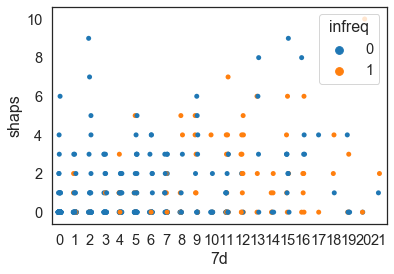

In [15]:
sns.stripplot(x='7d', y='shaps', hue='infreq', data=scores)